In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary_keras(clf, X, Y, h=0.01, strict=False):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    Z_strict = Z >= 0.5

    plt.figure(figsize=(15, 15))
    if strict:
        plt.contourf(xx, yy, Z_strict, cmap=plt.cm.Blues, alpha=0.8);
    else:
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8);
        
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.autumn);
    plt.title('Decision boundary');

In [3]:
def generate_dataset():
    ps = []
    for a in np.linspace(0, 2*np.pi, 1000):
        if (0.75*np.pi - 0.2) < a < (0.75*np.pi + 0.2):
            continue
        if (7.0*np.pi/4.0 - 0.2) < a < (7.0*np.pi/4.0 + 0.2):
            continue
        if (5.0*np.pi/4.0 - 0.2) < a < (5.0*np.pi/4.0 + 0.2):
            continue
        r = 1 + (np.random.rand()-0.5)*0.5
        x = np.cos(a)*r
        y = np.sin(a)*r
        ps.append([x,y])
    ps = np.array(ps)

    xs = np.linspace(-1.5, 1.5, 200)
    xs = xs + (np.random.rand(len(xs)) - 0.5)/10.0
    ys = -xs + (np.random.rand(len(xs)) - 0.5)/3.0

    xs2 = np.linspace(-1.5, -0.1, 200)
    xs2 = xs2 + (np.random.rand(len(xs2)) - 0.5)/10.0
    ys2 = xs2 + (np.random.rand(len(xs2)) - 0.5)/3.0

    ps2 = np.vstack([np.array([xs, ys]).T, 
                     np.array([xs2, ys2]).T])

    X = np.vstack([ps, ps2])
    y = np.array([0]*ps.shape[0] + [1]*ps2.shape[0])

    return X, y

In [4]:
X, y = generate_dataset()

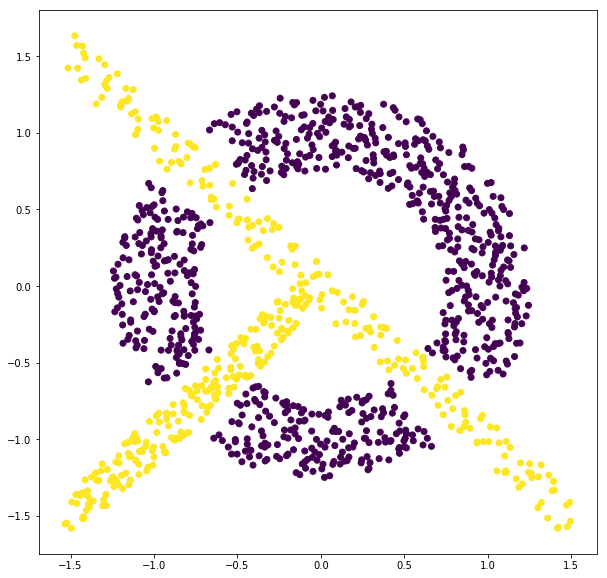

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Своя нейронная сеть</h3> 
    </div>
</div>

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from livelossplot import PlotLossesKeras

Добавьте в модель несколько полносвязных (`Dense`) слоёв. Определите оптимальное количество. Попробуйте использовать различные функции активации (`sigmoid`, `relu`, ..) и посмотрите, что будет получаться. 

In [ ]:
# Твой код здесь 
model = Sequential([
    ...
])

In [ ]:
model.summary()

Подберите оптимальный размер батча, количество эпох и оптимайзер. Размер батча будет влиять на скорость обучения. Количество эпох должно быть достаточным для того, чтобы лосс перестал падать. Добейтесь того, чтобы две фигуры на изображении разделялись нейронной сетью. 

In [ ]:
batch_size = ...
epochs = ...

In [ ]:
model.compile('sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=0,
          callbacks=[PlotLossesKeras()])

In [ ]:
plot_decision_boundary_keras(model, X, y, strict=True)

Подсказка: в данном лучше можно начать с б__О__льших сетей и постепенно уменьшать. Посмотрите, какой минимально возможной сетью можно разделить точки.

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Оптимайзер</h3> 
    </div>
</div>

In [8]:
from keras.optimizers import *

In [ ]:
# Функция создания нейронной сети, с параметрами, найденными выше

def create_model():
    return  Sequential([
        # Твой код здесь
        ...
])

Используя оптимайзер SGD, необходимо вручную подбирать параметр `learning_rate` (`lr`). Обычно он принимает значение от `1е-6` до `1е-1`. Подберите оптимальное значение `lr` для конкретной нейронной сети.

In [ ]:
learning_rates = [...]
histories = []

for lr in learning_rates:
    # Твой код здесь
    # создайте оптимайзер SGD с конкретным значением lr обучите модель и запишите history обучения модели в массив
    # в каждом цикле необходимо пересоздавать модель функцией create_model(), чтобы обнулять веса

После вызова у модели метода `fit()` и завершения обучения возвращается объект `history` в котором можно смотреть, как падал лосс или другие заданные метрики.

In [ ]:
accuracies = [h.history['acc'] for h in histories]

In [ ]:
for acc, l in zip(accuracies, learning_rates):
    plt.plot(acc, label=l)
plt.legend()

**Наилучший оптимайзер**: *ваш ответ*

In [ ]:
plot_decision_boundary_keras(model, X, y, strict=True)

Также можно подбирать параметр momentum, который поможет не застрять в локальном минимуме. Но если нет времени подбирать параметры `SGD`, то достаточно использовать оптимайзер `Adam` - он адаптивно подбирает `lr` сам. От выбранного оптимайзера будет зависеть скорость сходимости и минимально достижимое значение ошибки. 

Список доступных оптимайзеров в keras: https://keras.io/optimizers/

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Инициализация весов</h3> 
    </div>
</div>

После создания архитектуры и перед началом обучения нейронной сети её веса необходимо инициализировать. Веса инициализируют небольшими случайными значениями, но какими именно? От правильно выбора зависит сходимость сети и отсутствие затухающего или взрывающегося градиента. 

Обычно подбирают только веса ($W$), а отступы ($b$) инициализируют нулями.

Со списком всех возможных инициализаторов можно ознакомиться тут https://keras.io/initializers. Как и в предыдущем задании вам необходимо выбрать наилучший.

In [ ]:
# Твой код здесь
# Функция создания нейронной сети, с параметрами, найденными выше
# k_init - конкретное значение инициалайзера для параметра kernel_initializer у каждого слоя
def create_model(k_init):
    return  Sequential([
        ...
])

Самостоятельно найдите минмимум 4 различных варианта инициалайзера тут https://keras.io/initializers и сравните графики лосса для них

In [ ]:
k_init = [...]
histories = []

for k in k_init:
    # Твой код здесь
    # создайте модель с конкретным значением k_init обучите модель и запишите history обучения модели в массив
    # в каждом цикле необходимо пересоздавать модель функцией create_model(), чтобы обнулять веса

In [ ]:
accuracies = [h.history['acc'] for h in histories]

In [ ]:
for acc, l in zip(accuracies, k_init):
    plt.plot(acc, label=l)
plt.legend()

**Наилучший инициалайзер**: *ответ*

In [ ]:
plot_decision_boundary_keras(model, X, y, strict=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: Callbacks</h3> 
    </div>
</div>

Колбек - функция, которая выполняется после завершения эпохи или после каждого батча. 

С одним из них вы уже знакомы: __PlotLossesKeras__ рисует график лосса прямо во время обучения. 

Попробуйте самстоятельно еще два самых полезных колбека: 

* __EarlyStopping__ останавливает обучение если лосс переставает падать
* __ModelCheckpoint__ сохраняет веса модели по мере обучения. Это очень полезно, когда модель фитится по несколько дней 😥

Подробнее про них тут https://keras.io/callbacks/

In [ ]:
model = create_model()
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(...)